<a href="https://colab.research.google.com/github/Najiya98/mobile-price-range-classification/blob/main/mobile_price_range_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Everybody have mobile phones.And it plays an important role in our life.
Price is the most effective attribute of marketing and business.
Many features are very important to be considered to estimate
price of mobile.
In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile.

This  prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
Also it will be usefull for Consumers to verify that they are paying best price for a mobile.


**import** **libraries**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,classification_report


**load** **data**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/project/mobile_price_range_prediction.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0



**features**:-

Battery_Power: Total energy a battery can store in one time measured in mAh

Blu : Has bluetooth or not

Clock_speed : speed at which microprocessor executes instructions

dual_sim : Has dual sim support or not

fc : Front camera mega pixels

four_g : Has 4G or not

int_memory : Internal memory in gigabytes

m_dep : Mobile depth in cm

mobile_wt : Weight of mobile phone

n_cores : Number of cores of processor

pc : Primary camera mega pixels

px_height : Pixelst ite

px_width : Pixel resolution width

ram : Random Access Memory in mega bytes

Sc_h: Screen height of mobile in cm

Sc_w : Screen width of mobile in cm

talk_time : longest time that a single battery change will last when you are

three_g : Has 3G or not

touch_screen : Has touch screen or not

wifi : Has wifi or not

Price_range : This is target variable with value of 0 (low cost),1(medium cost),2(high cost),3(very high cost)






**data** **analysis**

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
df.shape

(2000, 21)

In [6]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**data** **visualization**




<ipython-input-8-7f9e197ca394>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range',data=df,palette='ocean')


<Axes: xlabel='price_range', ylabel='count'>

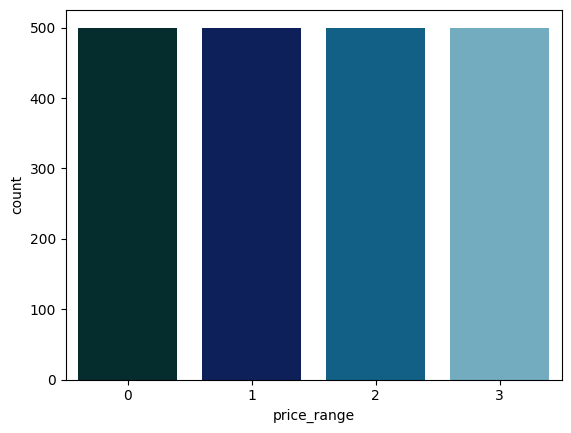

In [8]:
# checking balanced or imbalanced
sns.countplot(x='price_range',data=df,palette='ocean')

In [9]:
# correlation
df.corr(numeric_only=True)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

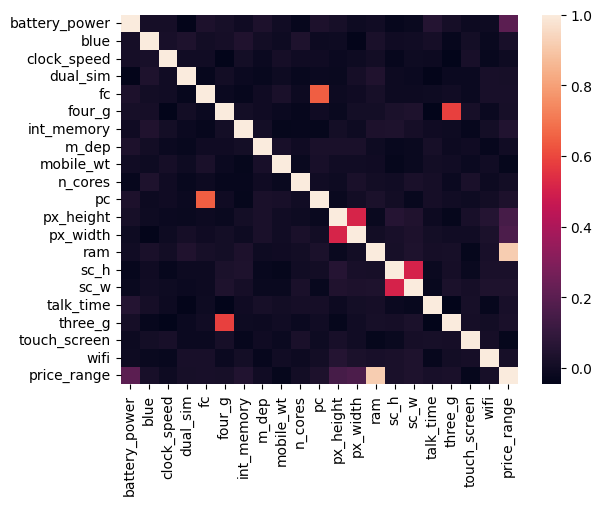

In [10]:
# heatmap

sns.heatmap(df.corr(numeric_only=True))

In [11]:
# here after heatmap ,some features are negative and close to zero that are clock_speed,toch_screen,m_dep,n_cores
# some features are good correlation with price range ie,battery_power,ram,px_width,px_height

In [12]:
# remove features
df.drop(['clock_speed','m_dep','n_cores','touch_screen'],axis=1,inplace=True)
df

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
0,842,0,0,1,0,7,188,2,20,756,2549,9,7,19,0,1,1
1,1021,1,1,0,1,53,136,6,905,1988,2631,17,3,7,1,0,2
2,563,1,1,2,1,41,145,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,0,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,2
4,1821,1,0,13,1,44,141,14,1208,1212,1411,8,2,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,106,14,1222,1890,668,13,4,19,1,0,0
1996,1965,1,1,0,0,39,187,3,915,1965,2032,11,10,16,1,1,2
1997,1911,0,1,1,1,36,108,3,868,1632,3057,9,1,5,1,0,3
1998,1512,0,0,4,1,46,145,5,336,670,869,18,10,19,1,1,0


<Axes: xlabel='price_range', ylabel='battery_power'>

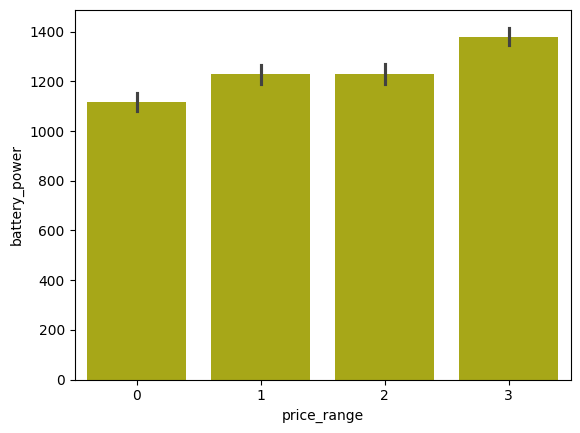

In [13]:
# plotting barplot of price range and battery power
sns.barplot(y='battery_power',x='price_range',data=df,color='y')

<ipython-input-14-c6b4511c002a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range',y='px_height',data=df,palette='Reds')
<ipython-input-14-c6b4511c002a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range',y='px_width',data=df,palette='Blues')


<Axes: xlabel='price_range', ylabel='px_width'>

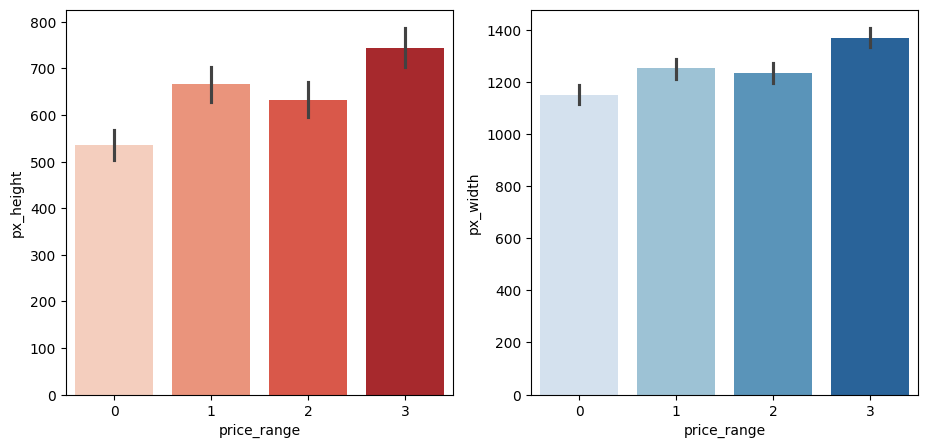

In [14]:
# plotting a barplot of price range and pixel height and width
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=df,palette='Reds')
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=df,palette='Blues')

<Axes: xlabel='price_range', ylabel='ram'>

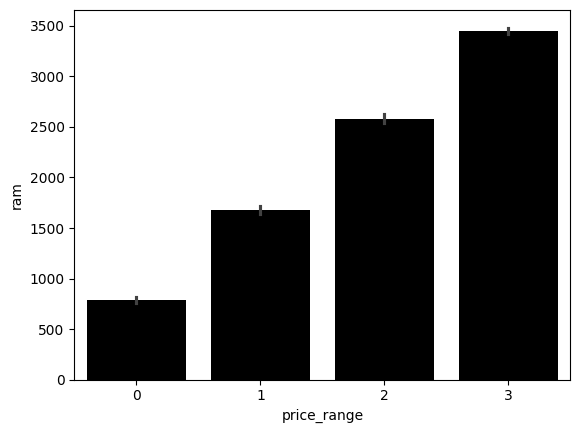

In [15]:
# plotting barplot of pricerange and ram
sns.barplot(y='ram',x='price_range',data=df,color='k')

<Axes: xlabel='three_g', ylabel='count'>

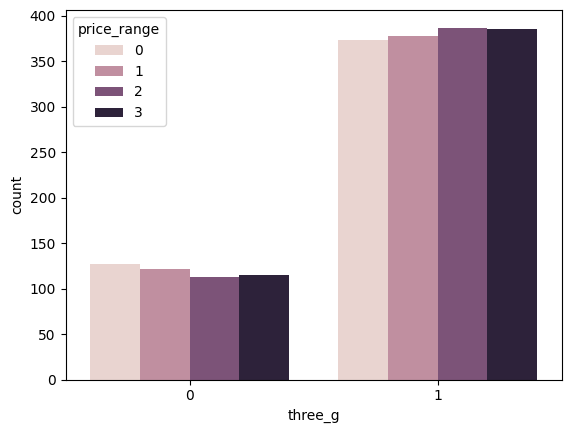

In [16]:
# plotting a countplot of price range and 3gand4g
sns.countplot(x='three_g',hue='price_range',data=df)

<Axes: xlabel='four_g', ylabel='count'>

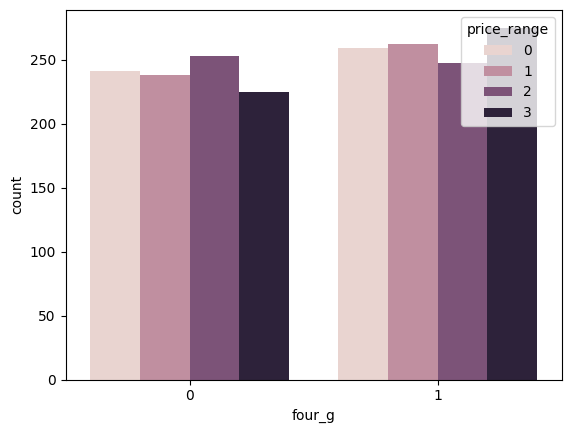

In [17]:
sns.countplot(x='four_g',hue='price_range',data=df)

<Axes: xlabel='dual_sim', ylabel='int_memory'>

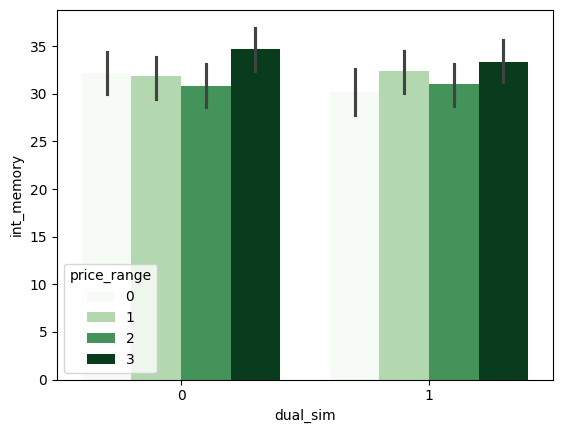

In [18]:
sns.barplot(y='int_memory',x='dual_sim',hue='price_range',data=df,palette='Greens')

**data** **preprocessing**

In [19]:
x=df.iloc[:,:-1]
x

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi
0,842,0,0,1,0,7,188,2,20,756,2549,9,7,19,0,1
1,1021,1,1,0,1,53,136,6,905,1988,2631,17,3,7,1,0
2,563,1,1,2,1,41,145,6,1263,1716,2603,11,2,9,1,0
3,615,1,0,0,0,10,131,9,1216,1786,2769,16,8,11,1,0
4,1821,1,0,13,1,44,141,14,1208,1212,1411,8,2,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,106,14,1222,1890,668,13,4,19,1,0
1996,1965,1,1,0,0,39,187,3,915,1965,2032,11,10,16,1,1
1997,1911,0,1,1,1,36,108,3,868,1632,3057,9,1,5,1,0
1998,1512,0,0,4,1,46,145,5,336,670,869,18,10,19,1,1


In [20]:
y=df.iloc[:,-1]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [21]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.22778891, 0.        , 0.        , ..., 0.94444444, 0.        ,
        1.        ],
       [0.34736139, 1.        , 1.        , ..., 0.27777778, 1.        ,
        0.        ],
       [0.04141617, 1.        , 1.        , ..., 0.38888889, 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 1.        , ..., 0.16666667, 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.        , ..., 0.94444444, 1.        ,
        1.        ],
       [0.00601202, 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ]])

**model** **building**

**knn**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 1, 0, 3, 2, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 3, 0, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 2, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 3, 2, 1,
       0, 2, 1, 0, 3, 2, 3, 1, 2, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 2, 0, 3, 1, 0, 2, 3, 3, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       1, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 2, 3, 3, 3, 2,

In [24]:
y_test.values

array([0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 0, 3, 2, 1,
       0, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 2, 1, 0, 3, 2, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 3, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 3, 0, 1, 0, 3, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 2, 0, 1, 3, 0, 3, 3, 3, 1, 2, 2, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

91.33333333333333
[[131   4   0   0]
 [  8 134   7   0]
 [  0  10 150   8]
 [  0   0  15 133]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       135
           1       0.91      0.90      0.90       149
           2       0.87      0.89      0.88       168
           3       0.94      0.90      0.92       148

    accuracy                           0.91       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.91      0.91      0.91       600



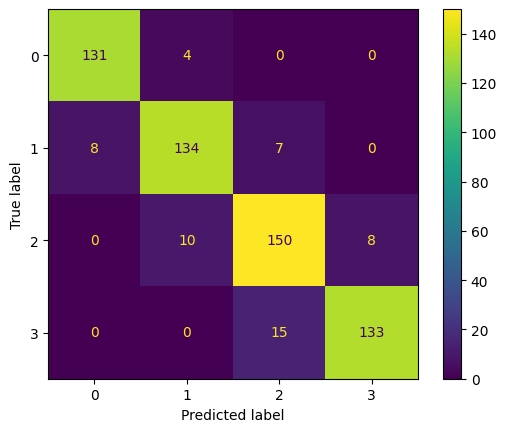

In [25]:
print(accuracy_score(y_test,y_pred)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

**svc**

In [26]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred1=sv.predict(x_test)
y_pred1

array([0, 0, 1, 0, 3, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 2, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 3, 1,

94.0
[[134   1   0   0]
 [  7 138   4   0]
 [  0  11 149   8]
 [  0   0   5 143]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       135
           1       0.92      0.93      0.92       149
           2       0.94      0.89      0.91       168
           3       0.95      0.97      0.96       148

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



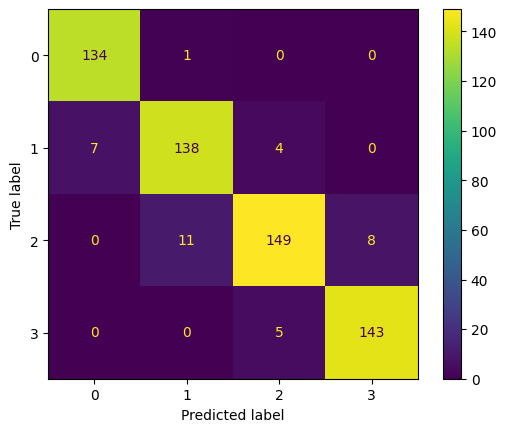

In [27]:
print(accuracy_score(y_test,y_pred1)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

**naive** **bayes**

In [28]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred2=nb.predict(x_test)
y_pred2

array([0, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 2, 0, 0, 0, 3, 2, 2, 3, 2, 2, 1,
       2, 1, 3, 0, 1, 2, 1, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 2, 2, 3, 1, 2, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1,
       0, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 2, 3,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 1, 0, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 2, 2, 3, 2, 1,

77.83333333333333
[[118  17   0   0]
 [ 11 106  32   0]
 [  0  31 118  19]
 [  0   1  22 125]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       135
           1       0.68      0.71      0.70       149
           2       0.69      0.70      0.69       168
           3       0.87      0.84      0.86       148

    accuracy                           0.78       600
   macro avg       0.79      0.78      0.79       600
weighted avg       0.78      0.78      0.78       600



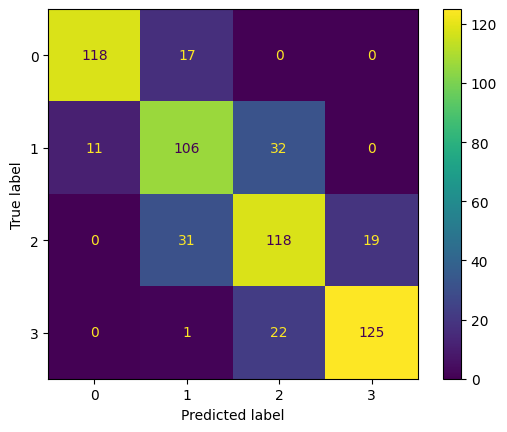

In [29]:
print(accuracy_score(y_test,y_pred2)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

**decisiontreeclassifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=4)
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
y_pred4

array([0, 0, 1, 0, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 1, 1, 1, 0, 3, 1,
       0, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 3, 2, 3, 3, 2, 0, 2, 1, 3, 2, 2,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 3, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 2, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 2, 3, 3, 1, 1,
       0, 2, 1, 1, 3, 2, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 0, 0, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 2, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 3, 0, 1, 0, 3, 1,
       0, 1, 2, 1, 2, 3, 1, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 2, 1, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 2, 3, 0, 3, 2, 2, 0, 0, 2, 2, 3, 0, 0, 0, 3, 3, 2, 1, 2, 2, 0,
       0, 2, 0, 0, 1, 3, 3, 3, 0, 0, 1, 3, 3, 3, 2,

82.66666666666667
[[125  10   0   0]
 [ 10 104  35   0]
 [  0  12 135  21]
 [  0   0  16 132]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       135
           1       0.83      0.70      0.76       149
           2       0.73      0.80      0.76       168
           3       0.86      0.89      0.88       148

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



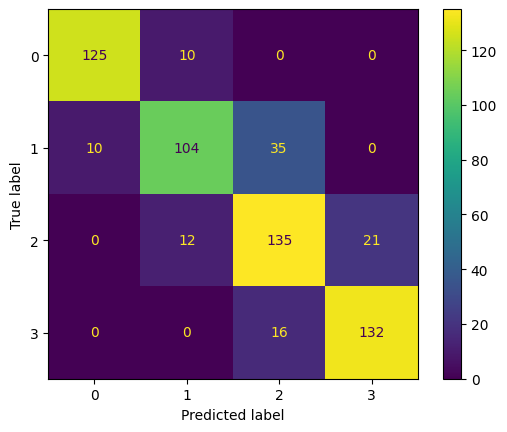

In [31]:
print(accuracy_score(y_test,y_pred4)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

**random** **forest** **classifier**

In [32]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)
y_pred5=dt.predict(x_test)
y_pred5

array([0, 0, 1, 0, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 1, 1, 1, 0, 3, 1,
       0, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 3, 2, 3, 3, 2, 0, 2, 1, 3, 2, 2,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 3, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 2, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 2, 3, 3, 1, 1,
       0, 2, 1, 1, 3, 2, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 0, 0, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 2, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 3, 0, 1, 0, 3, 1,
       0, 1, 2, 1, 2, 3, 1, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 2, 1, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 2, 3, 0, 3, 2, 2, 0, 0, 2, 2, 3, 0, 0, 0, 3, 3, 2, 1, 2, 2, 0,
       0, 2, 0, 0, 1, 3, 3, 3, 0, 0, 1, 3, 3, 3, 2,

82.66666666666667
[[125  10   0   0]
 [ 10 104  35   0]
 [  0  12 135  21]
 [  0   0  16 132]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       135
           1       0.83      0.70      0.76       149
           2       0.73      0.80      0.76       168
           3       0.86      0.89      0.88       148

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



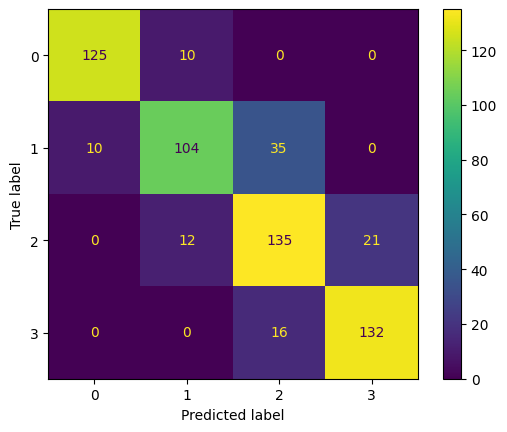

In [33]:
print(accuracy_score(y_test,y_pred5)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

In [34]:
# here conclude svc is the best model

**hyper** **parameter** **tunning**

In [35]:
sv1=SVC()


In [ ]:
params={'kernel':['linear','poly','rbf'],'gamma':['auto','scale']}
gsv=GridSearchCV(sv1,params,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)
print(gsv.best_params_)

In [ ]:
sv1=SVC(kernel='linear',gamma='auto')
sv1.fit(x_train,y_train)
y_pred1=sv1.predict(x_test)
y_pred1

In [ ]:
score=accuracy_score(y_test,y_pred1)
score

**deploy**

In [ ]:
y_new=sv1.predict(scaler.transform([[842,0,2.2,0,1,	0,7,0.6,188,2,20,756,2549,9,7,19,0,0,1,1]]))

In [ ]:
import pickle
pickle.dump(sv1,open('model5.sav','wb'))

In [ ]:
pickle.dump(scaler,open('scaler5.sav','wb'))